**Question 1**

part_1

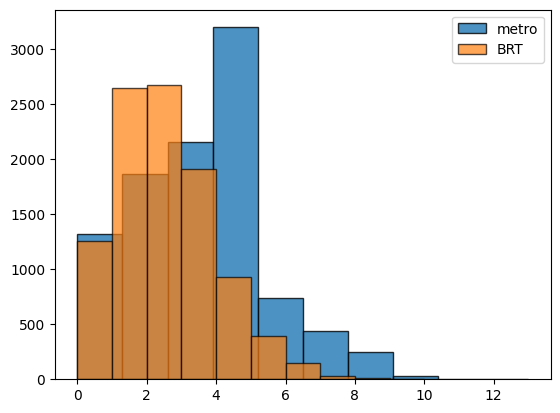

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Tarbiat.csv')

# df['metro'].plot(kind='hist', color='b')
# df['BRT'].plot(kind='hist', color='r')

plt.hist(df['metro'], label='metro', alpha=0.8, edgecolor='black')
plt.hist(df['BRT'], label='BRT', alpha=0.7, edgecolor='black')
plt.legend()

# Showing the plot using plt.show()
plt.show()

part 2

با توجه به نمودار های رسم شده و اطلاعات درسی، این دو ، دو متغیر تصادفی با توزیع پواسون هستند زیرا طبق تعریف، توزیع پواسون برای محاسبه احتمال وقوع رویداد های نادر و رویداد ها در یک بازه زمانی یا مکانی مشخص استفاده می شوند

In [ ]:
parameter_of_metro = df['metro'].mean()
parameter_of_BRT = df['BRT'].mean()
print(parameter_of_metro, parameter_of_BRT)

3.5316 2.0636


part 3

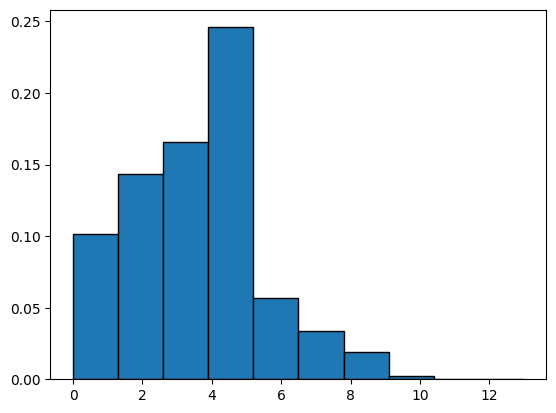

In [ ]:
plt.hist(df['metro'], density=True, edgecolor='black')
plt.show()

part 4

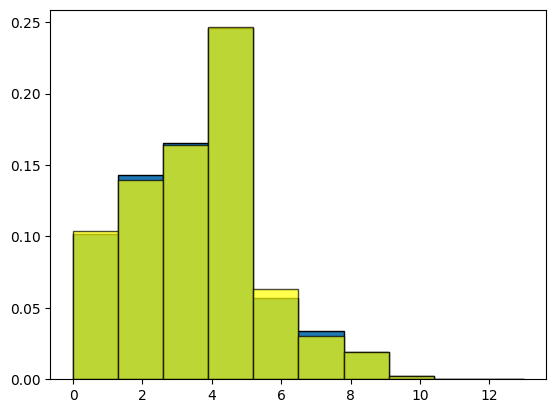

In [ ]:
from scipy.stats import poisson

plt.hist(df['metro'], density=True, edgecolor='black')

poisson_parameter = 3.5316
data = poisson.rvs(poisson_parameter, size=9999)

plt.hist(data, density=True, alpha=0.7, color='yellow', edgecolor='black')

plt.show()

part 5

با توجه به اینکه از حاصل جمع دو توزیع پواسون مستقل بدست می آید دارای توزیع پواسون با پارامتری برابر حاصل جمع پارامتر های دو متغیر تصادفی است X ~ Poi(λ1) Y ~ Poi(λ2) Z ~ Poi(λ1 + λ2)

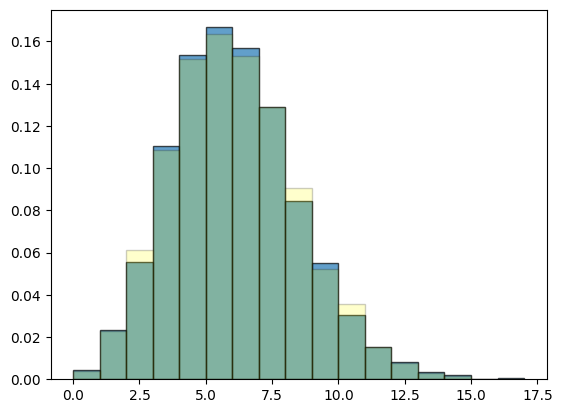

In [ ]:
from scipy.stats import poisson

temp_data = df['metro']+df['BRT']
plt.hist(temp_data, bins=range(min(temp_data), max(temp_data)), alpha=0.7, density=True, edgecolor='black')


poisson_parameter = parameter_of_metro + parameter_of_BRT
data = poisson.rvs(poisson_parameter, size=9999)

plt.hist(data, bins=range(min(data), max(data)), density=True, alpha=0.2, color='yellow', edgecolor='black')

plt.show()

part 6

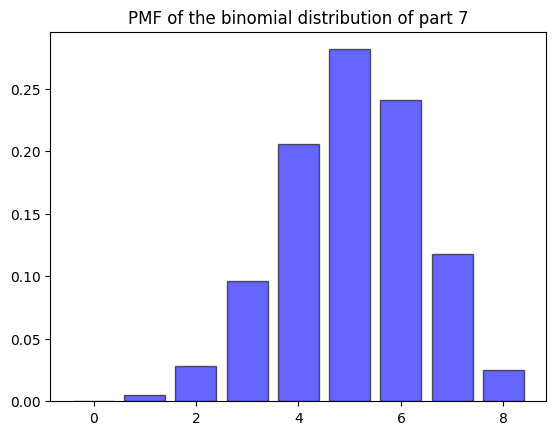

In [ ]:
from scipy.stats import binom

n = 8
p = parameter_of_metro / (parameter_of_metro + parameter_of_BRT)

x = range(n + 1)
pmf_values = binom.pmf(x, n, p)

plt.bar(x, pmf_values, align='center', alpha=0.6, color='b', edgecolor='black')
plt.title('PMF of the binomial distribution of part 7')


plt.show()

part 8

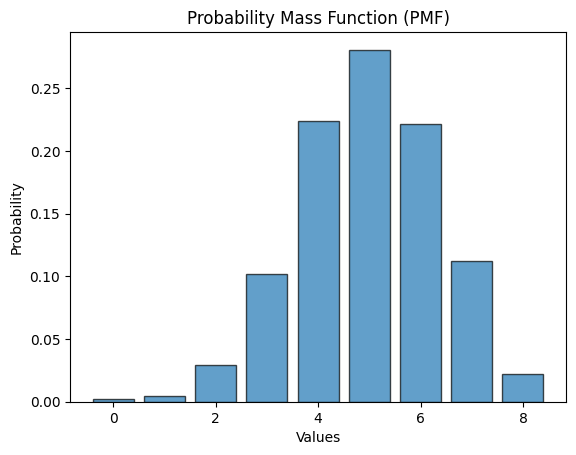

In [ ]:
#df = pd.read_csv('Tarbiat.csv')

sum_of_rows = df.sum(axis=1)
condition = (sum_of_rows == 8)

new_df = df[condition]
pmf = new_df['metro'].value_counts(normalize=True).sort_index()
plt.bar(pmf.index, pmf.values, align='center', alpha=0.7, edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF)')
plt.show()